In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
cars = pd.read_csv(r"C:\Users\ayush\Downloads\Toyoto_Corrola.csv")
cars.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [4]:
#check for missing values
cars.isna().sum()

Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

# Correlation matrix

In [12]:
"""if you have variables like 'Age_08_04', 'KM', 'HP', and 'Price' in your cars dataset, the correlation matrix might show 
how these variables are related. If the correlation coefficient between 'Age_08_04' and 'Price' is negative and close to -1,
it suggests that older cars tend to have lower prices. If the correlation coefficient between 'HP' (horsepower) and 'Price' 
is positive and close to 1, it suggests that cars with higher horsepower tend to have higher prices."""
cars.corr()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.130207,NaN,-0.043343,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.043343,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


# Scatterplot between variables along with histograms

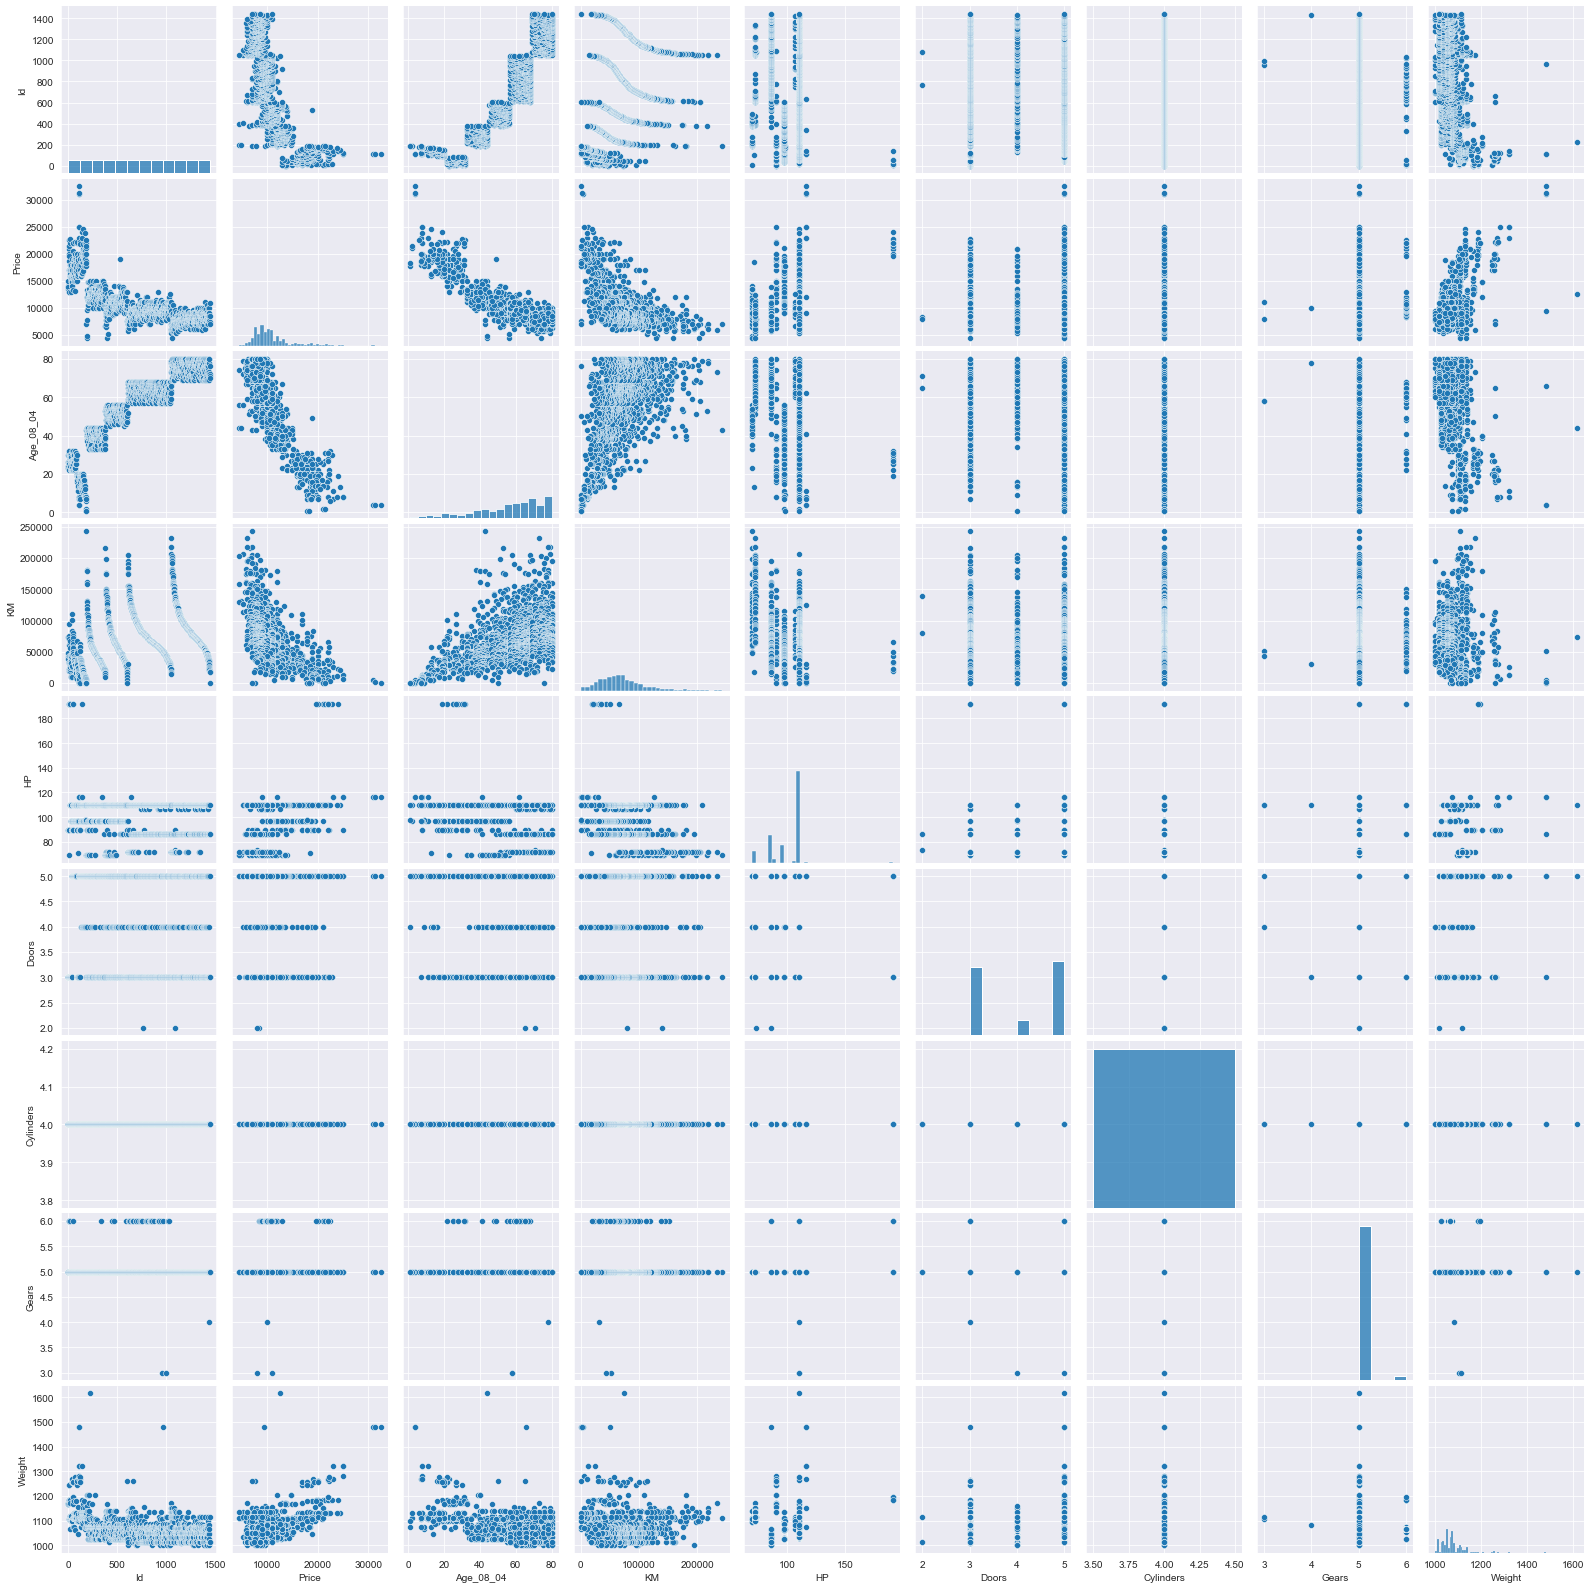

In [6]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style="darkgrid")
sns.pairplot(cars)

# Preparing a model

In [7]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight',data=cars).fit()

In [10]:
#Coefficients
"""For instance, if the coefficient for 'Age_08_04' is -1000, it means that, on average, for each year increase in 'Age_08_04',
the predicted 'Price' of the car decreases by $1000, assuming all other variables are held constant.
model.params"""
model.params

Intercept    -410.845504
Age_08_04    -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Cylinders   -1643.382016
Gears         622.282925
Weight         18.609651
dtype: float64

In [32]:
#t and p-Values
"""A larger absolute t-value indicates a stronger relationship between the independent variable and the dependent variable.
If the t-value is positive, it suggests a positive relationship, and if it's negative, it suggests a negative relationship.
For example, if you have a coefficient associated with an independent variable 'Age_08_04', a positive t-value could mean that 
there's a positive relationship between the age of the car and its price. A low p-value (e.g., less than 0.05) for this
coefficient would indicate that the age of the car is statistically significant in predicting its price."""  
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.323309
Age_08_04   -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Cylinders    -5.323309
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Cylinders     1.181900e-07
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [29]:
#R squared values
"""R-squared - tells you how well your model fits the data overall. In this case, an R-squared of 0.75 means your model captures 
about 75% of the price variability using the age, mileage, and horsepower variables.
Adjusted R-squared - considers the complexity of the model. It's slightly lower than R-squared (0.72), indicating that while 
your model is good, it's not overfitting by including unnecessary variables."""
(model.rsquared,model.rsquared_adj)

(0.8628024511073658, 0.8622263942190832)

# Simple Linear Regression Models

In [42]:
ml_v=smf.ols('Price~HP',data = cars).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept     4.803134
HP           12.567862
dtype: float64 
 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


In [39]:
ml_w=smf.ols('Price~Weight',data = cars).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept   -20.263590
Weight       27.045855
dtype: float64 
 Intercept     1.739508e-80
Weight       1.630487e-130
dtype: float64


In [43]:
ml_wv=smf.ols('Price~HP+Weight',data = cars).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept   -23.878731
HP           12.981350
Weight       27.303632
dtype: float64 
 Intercept    2.299964e-106
HP            1.636770e-36
Weight       1.652688e-132
dtype: float64


# Calculating VIF

In [52]:
""" High VIF values might suggest that 'Age_08_04' is highly correlated with other variables in the model, 
potentially affecting the reliability of the regression coefficients."""
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age_08_04~KM+HP+Doors+Cylinders+Gears+Weight',data=cars).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age_08_04+HP+Doors+Cylinders+Gears+Weight',data=cars).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age_08_04+KM+Doors+Cylinders+Gears+Weight',data=cars).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_Doors=smf.ols('Doors~Age_08_04+KM+HP+Cylinders+Gears+Weight',data=cars).fit().rsquared
vif_CC=1/(1-rsq_Doors)

rsq_Cylinders=smf.ols('Cylinders~Age_08_04+KM+HP+Doors+Gears+Weight',data=cars).fit().rsquared
vif_DR=1/(1-rsq_Cylinders)

rsq_Gears=smf.ols('Gears~Age_08_04+KM+HP+Doors+Cylinders+Weight',data=cars).fit().rsquared
vif_GR=1/(1-rsq_Gears)

rsq_Weight=smf.ols('Weight~Age_08_04+KM+HP+Doors+Cylinders+Gears',data=cars).fit().rsquared
vif_WT=1/(1-rsq_Weight)

# Putting the values in Dataframe format
d1={'Variables':['Age_08_04','KM','HP','Doors','Cylinders','Gears','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

C:\Users\ayush\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Variables,Vif
0,Age_08_04,1.874542
1,KM,1.627039
2,HP,1.214909
3,Doors,1.149301
4,Cylinders,0.000000
5,Gears,1.096501
6,Weight,1.508041


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

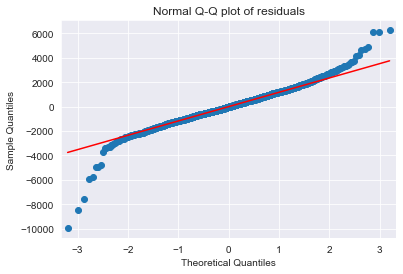

In [53]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [54]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   48,   49,   51,   52,
          53,   56,   58,   59,   61,   62,   63,   64,   65,   66,   68,
          69,   70,   72,   74,   75,   76,   77,   78,   80,   81,   83,
          84,   85,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  127,
         128,  134,  136,  138,  139,  141,  142,  143,  144,  146,  147,
         148,  149,  150,  151,  152,  153,  154,  156,  157,  158,  159,
         160,  161,  162,  163,  165,  166,  167,  168,  169,  170,  171,
         172,  173,  174,  175,  176,  177,  178,  179,  180,  181,  182,
         183,  190,  194,  196,  197,  201,  204,  210,  211,  216,  223,
         230,  232,  233,  237,  238, 

# Residual Plot for Homoscedasticity

In [55]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

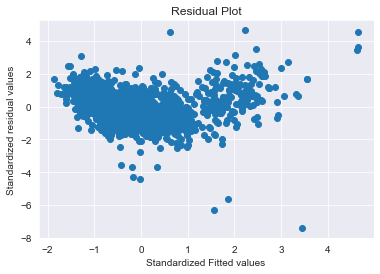

In [56]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

eval_env: 1


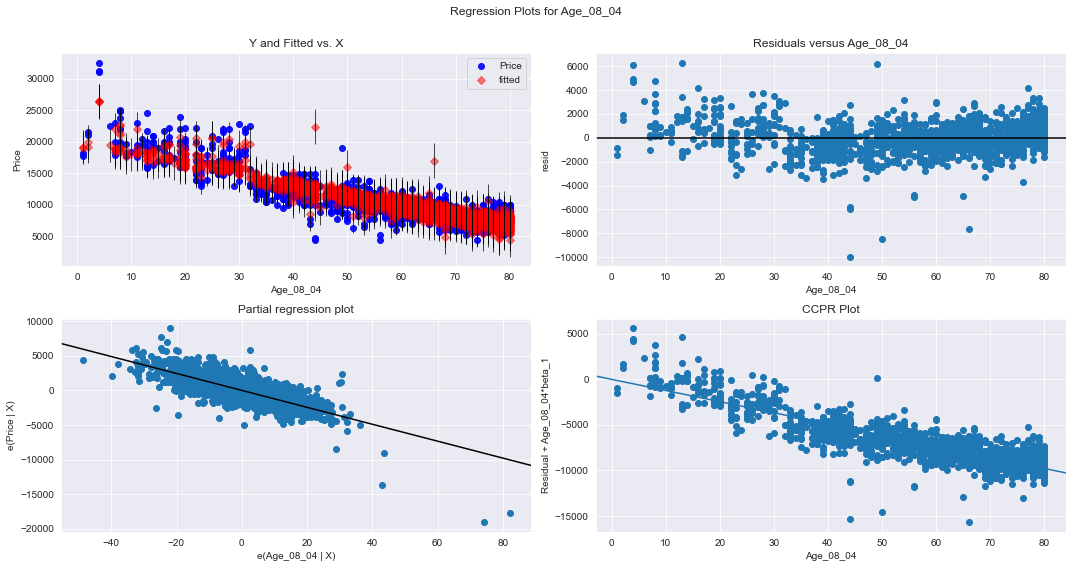

In [58]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

eval_env: 1


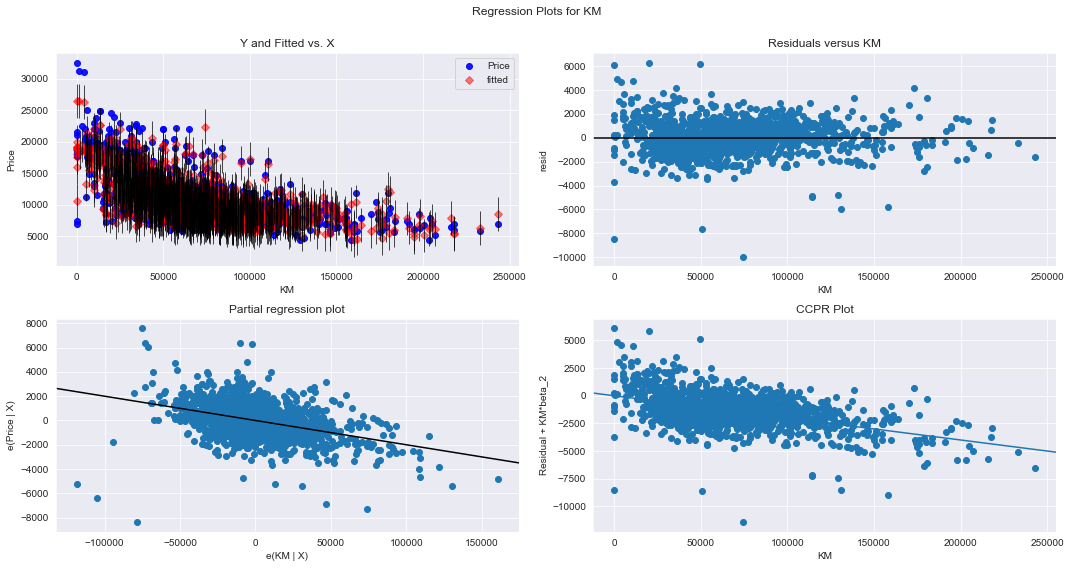

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


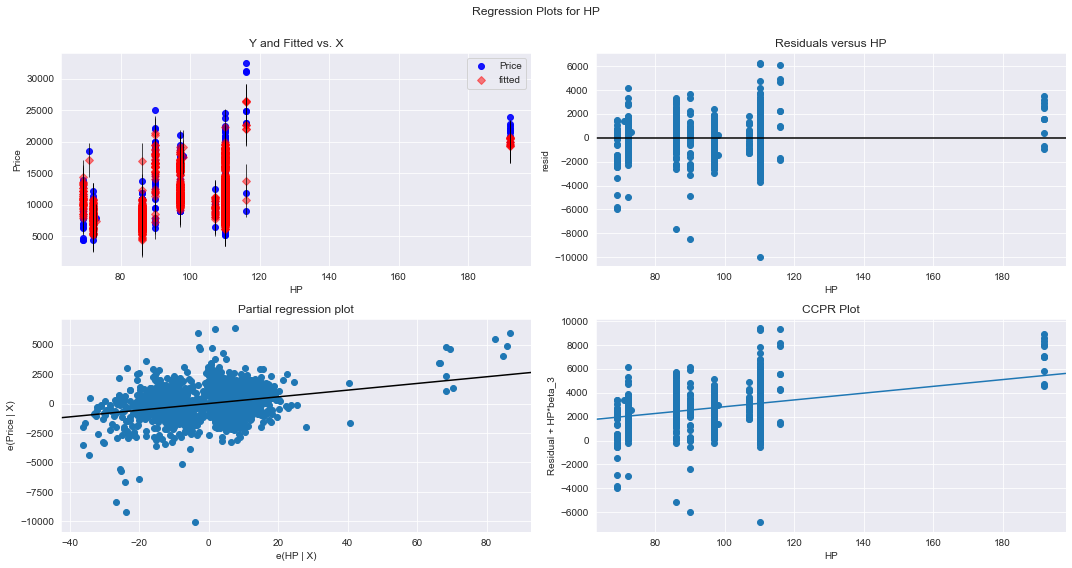

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


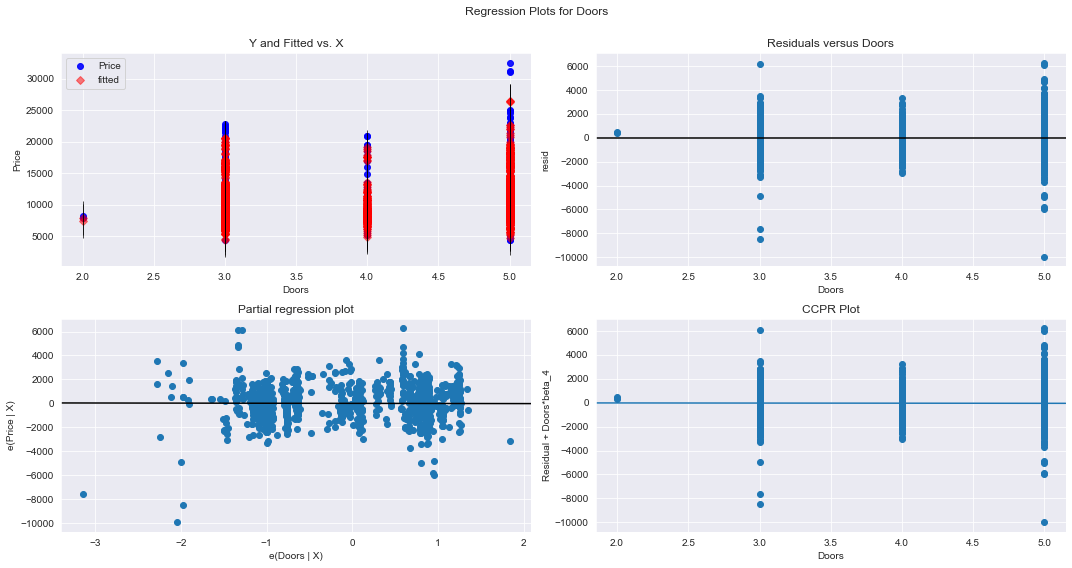

In [61]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


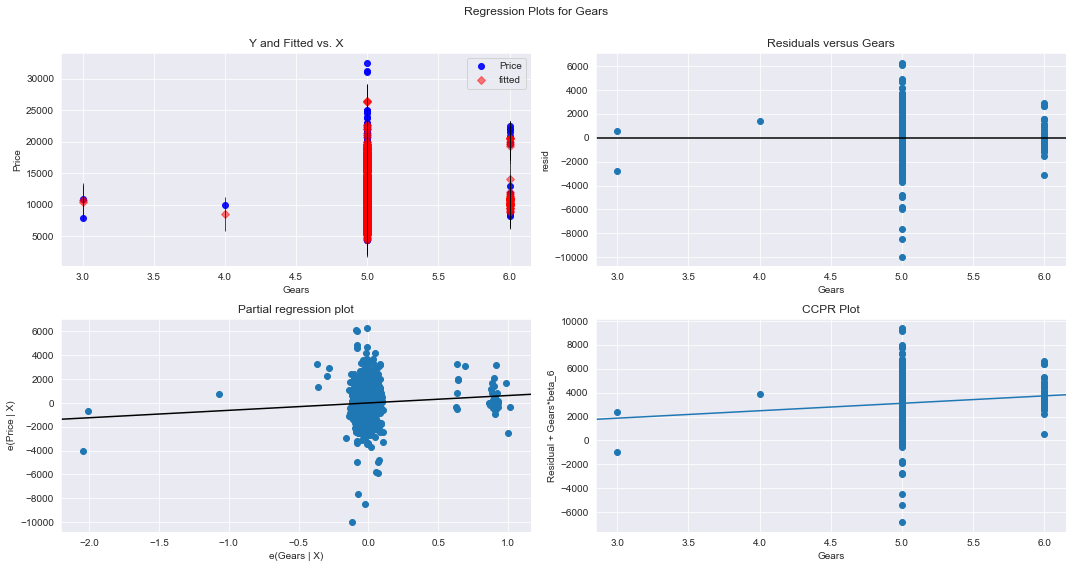

In [62]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


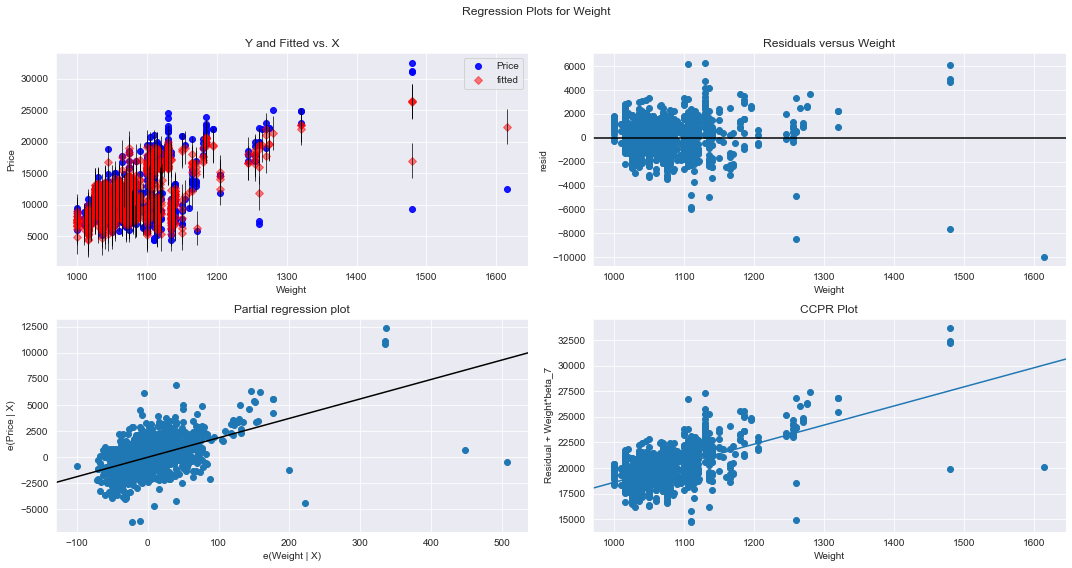

In [63]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook’s Distance

In [65]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

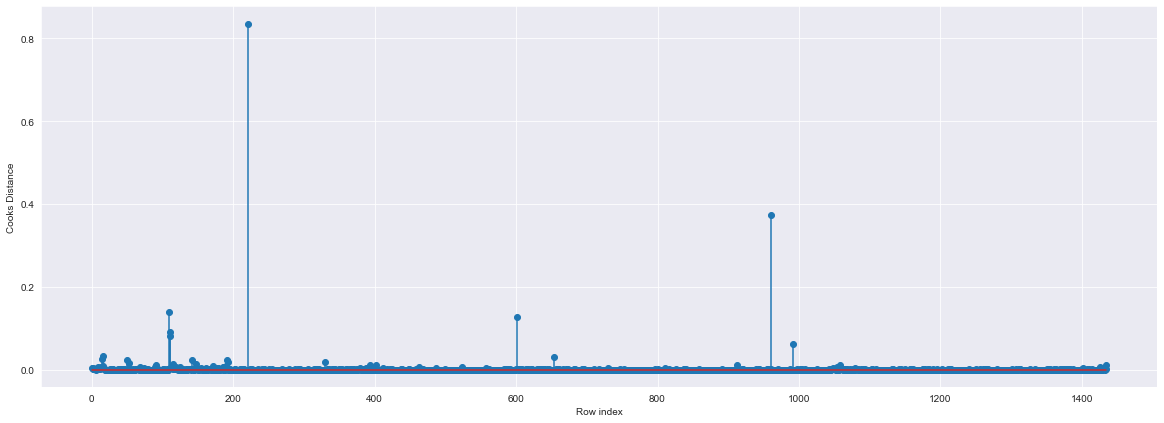

In [66]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [67]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(221, 0.8359007508853545)

# High Influence points

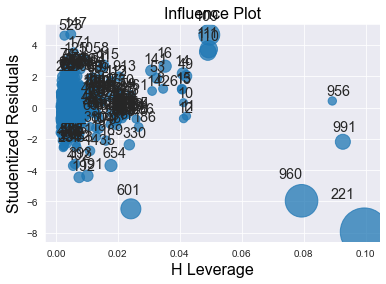

In [68]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [69]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

### From the above plot, it is evident that data point 70 and 76 are the influencers

In [72]:
cars[cars.index.isin([221,960])]

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
221,223,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,74172,110,5,4,5,1615
960,964,TOYOTA Corolla,9390,66,50806,86,3,4,5,1480


In [71]:
#See the differences in HP and other variable values
cars.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [73]:
cars_new = pd.read_csv(r"C:\Users\ayush\Downloads\Toyoto_Corrola.csv")
cars_new.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [76]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars_new.drop(cars_new.index[[221,960]],axis=0).reset_index()

In [80]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [81]:
car1.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [93]:
#Exclude variable "Cylinders" and generate R-Squared and AIC values
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight',data = car1).fit()

In [94]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8728201848607587, 24633.588496856977)

In [95]:
#Exclude variable "Gears" and generate R-Squared and AIC values
final_ml_W= smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Weight',data = car1).fit()

In [96]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.8719992117277906, 24640.815526801816)

### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'Gears' so that multi collinearity problem would be resolved

# Cook’s Distance

In [102]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

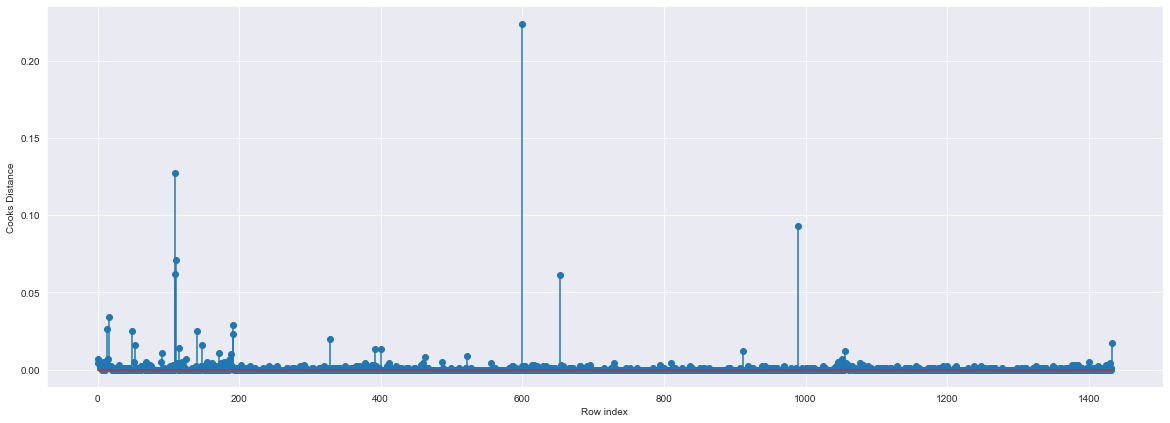

In [98]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [99]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(600, 0.22365466047000596)

In [105]:
car2=car1.drop(car1.index[[600]],axis=0)

In [106]:
car2

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1430,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1431,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1432,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [107]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [108]:
car4=car3.drop(['index'],axis=1)

In [109]:
car4

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1429,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1430,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1431,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [111]:
#Build the model on the new data
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight',data = car4).fit()

In [112]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

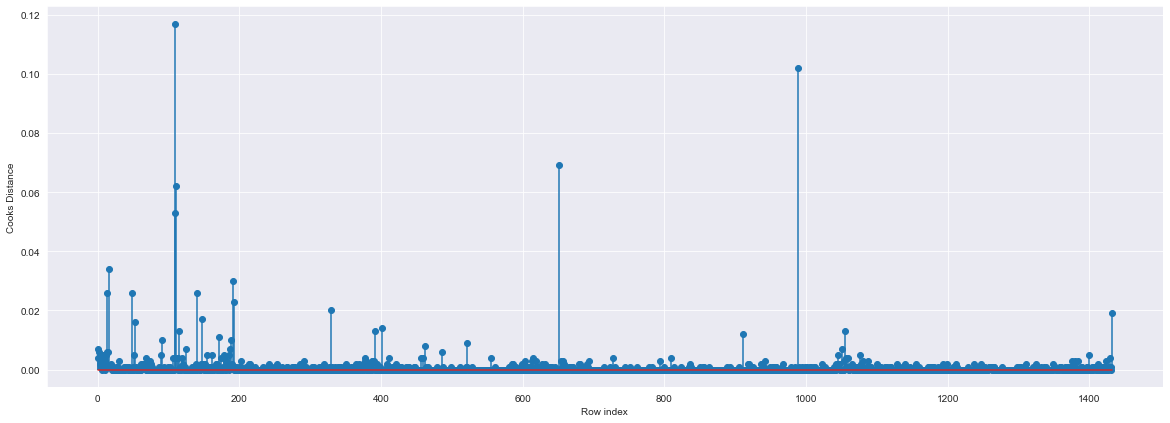

In [113]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [150]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(109, 0.09685043362487986)

In [151]:
car5=car4.drop(car4.index[[109]],axis=0)

In [152]:
car5

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1429,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1430,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1431,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [153]:
#Reset the index and re arrange the row values
car6=car5.reset_index()

In [154]:
car7=car6.drop(['index'],axis=1)

In [155]:
car7

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1427,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1428,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1429,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1430,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [156]:
#Build the model on the new data
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight',data = car7).fit()

In [157]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

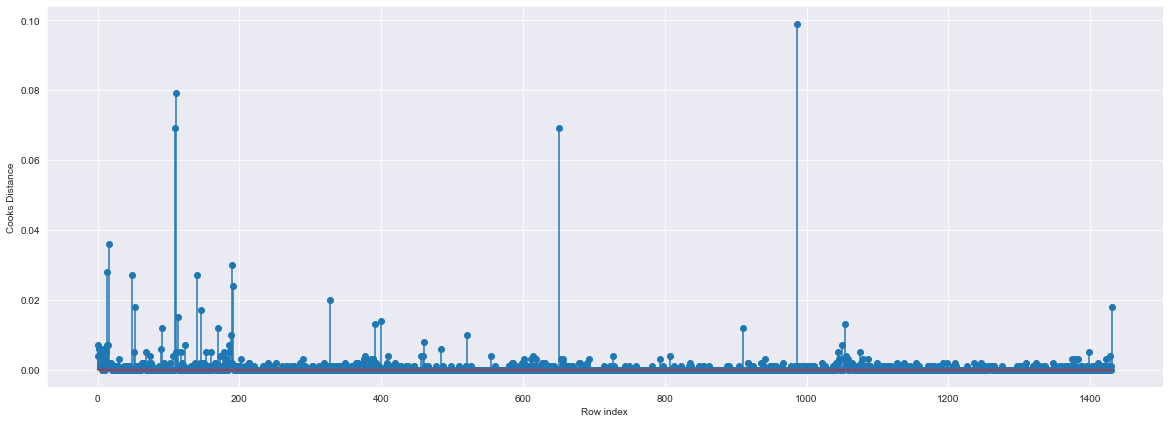

In [160]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car7)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [161]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(987, 0.09871263425657484)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [171]:
#Check the accuracy of the mode
final_ml_V= smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Weight',data = car7).fit()

In [172]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8755059597579958, 24533.435928501447)

# Predicting for new data

In [173]:
#New data for prediction
new_data=pd.DataFrame({'Age_08_04':20,'KM':30000,'HP':120,'Doors':4,'Gears':5,'Weight':1280},index=[1])

In [174]:
final_ml_V.predict(new_data)

1    20929.749295
dtype: float64

In [175]:
final_ml_V.predict(cars_new.iloc[0:5,])

0    16869.807777
1    16294.158875
2    16871.885467
3    16502.515670
4    16367.196687
dtype: float64

In [176]:
pred_y = final_ml_V.predict(cars_new)

In [177]:
pred_y

0       16869.807777
1       16294.158875
2       16871.885467
3       16502.515670
4       16367.196687
            ...     
1431     8880.637371
1432     8342.720870
1433     8501.663386
1434     8618.814737
1435    11051.719378
Length: 1436, dtype: float64